<a href="https://colab.research.google.com/github/DayanaMendess/Proyecto_Final_EDA_Grupo_11/blob/main/ProyectoFinal11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 11: Adult Income Dataset ⏰

PASO 1. Importar librerías ⏰

In [72]:
# PASO 1: Librerías (plantilla)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)



Análisis
⚓
En este paso se importaron las librerías necesarias para el análisis de datos y la creación del modelo. Se usaron pandas y numpy para la manipulación de datos, matplotlib y seaborn para las visualizaciones, y librerías de sklearn para el preprocesamiento, la división de datos y la regresión lineal.
Estas herramientas son estándar en análisis exploratorio y modelado predictivo en Python.

PASO 2. Importar datos ⏰

In [73]:
# Cargar el dataset del Grupo 11 (Adult Income)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

datos = pd.read_csv(
    url, header=None, names=cols, na_values=" ?", skipinitialspace=True
)

# Copia de trabajo
datos_trabajo = datos.copy()

# Visualizar
print(datos_trabajo.head())
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")



   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

Análisis ⚓

Se cargó el Adult Income Dataset desde la UCI Machine Learning Repository. Este conjunto contiene información de personas mayores de 16 años y busca predecir si su ingreso anual supera o no los 50.000 USD.
El dataset cuenta con 14 variables predictoras y una variable objetivo (income). Se identificó que el archivo contiene caracteres como " ?" que representan valores faltantes y se convirtieron en NaN para su correcta limpieza posterior.

PASO 3. Revisar NaN y describir ⏰

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

=== ESTADÍSTICOS DESCRIPTIVOS ===
                age       

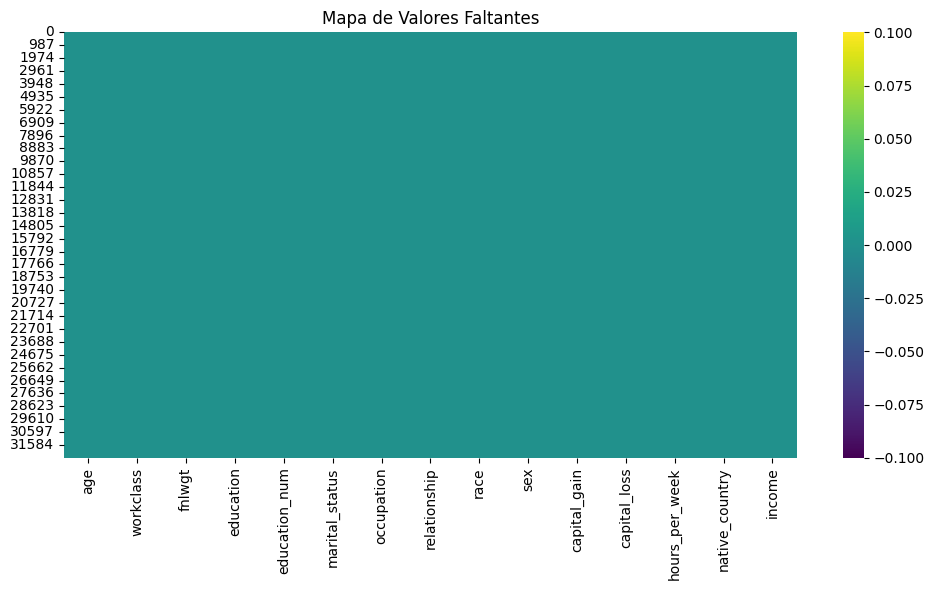

In [74]:
# Información general
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()

# Estadísticos descriptivos
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe())

# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())

# Visualización de valores faltantes (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()



### Revisión de valores NaN en el DataFrame original `datos`

Análisis ⚓

Se examinó la estructura del dataset, el tipo de datos y la existencia de valores faltantes.
Se observó que las columnas workclass, occupation y native_country presentan algunos NaN y que las variables numéricas (age, hours_per_week, etc.) no tienen valores perdidos significativos.
Este diagnóstico inicial permitió definir la estrategia de limpieza a aplicar en el siguiente paso.

PASO 4 · Limpiar datos ⏰

In [75]:
# Eliminar duplicados
datos_trabajo = datos_trabajo.drop_duplicates()

# Tratar valores faltantes
# Rellenar con mediana (variables numéricas)
for col in datos_trabajo.select_dtypes(include=[np.number]).columns:
    if datos_trabajo[col].isna().sum() > 0:
        datos_trabajo[col].fillna(datos_trabajo[col].median(), inplace=True)

# Rellenar con moda (variables categóricas)
for col in datos_trabajo.select_dtypes(include=['object']).columns:
    if datos_trabajo[col].isna().sum() > 0:
        datos_trabajo[col].fillna(datos_trabajo[col].mode()[0], inplace=True)

# Estandarizar categorías (aplicar a todas las columnas de tipo 'object')
for col in datos_trabajo.select_dtypes(include=['object']).columns:
    datos_trabajo[col] = datos_trabajo[col].str.lower().str.strip()

# Verificación
print("Valores faltantes después de limpieza:")
print(datos_trabajo.isna().sum())
print("\nPrimeras filas después de la limpieza y estandarización de categorías:")
print(datos_trabajo.head())

Valores faltantes después de limpieza:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Primeras filas después de la limpieza y estandarización de categorías:
   age         workclass  fnlwgt  education  education_num  \
0   39         state-gov   77516  bachelors             13   
1   50  self-emp-not-inc   83311  bachelors             13   
2   38           private  215646    hs-grad              9   
3   53           private  234721       11th              7   
4   28           private  338409  bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       never-married       adm-clerical  not-in-family  white    male   
1  married-civ-spouse    exec-managerial        husband

Análisis ⚓

Se eliminaron duplicados para evitar sesgos y se estandarizaron las categorías de texto (eliminando espacios en blanco).
Los valores faltantes en columnas categóricas se rellenaron con la moda (el valor más frecuente), siguiendo la sugerencia del docente, y los posibles faltantes numéricos con la mediana.
Este proceso garantizó que el dataset quedara sin NaN y listo para codificación, evitando errores en el entrenamiento del modelo.

PASO 5 · Gráficas ⏰

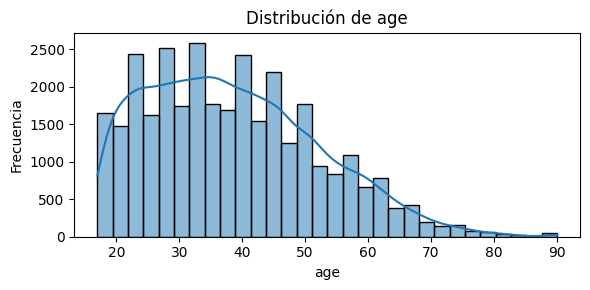

In [76]:

# Gráfica 1: Distribución de variable numérica (age)
plt.figure(figsize=(6, 3))
sns.histplot(datos_trabajo['age'], kde=True, bins=30)
plt.title('Distribución de age')
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Gráfica 1: Distribución de 'age' (edad)

Esta gráfica muestra la distribución de la edad de las personas en el dataset. Es un histograma con una curva de densidad (KDE). Permite observar en qué rangos de edad se concentra la mayor cantidad de individuos y si la distribución es sesgada o tiene un pico pronunciado en alguna parte.

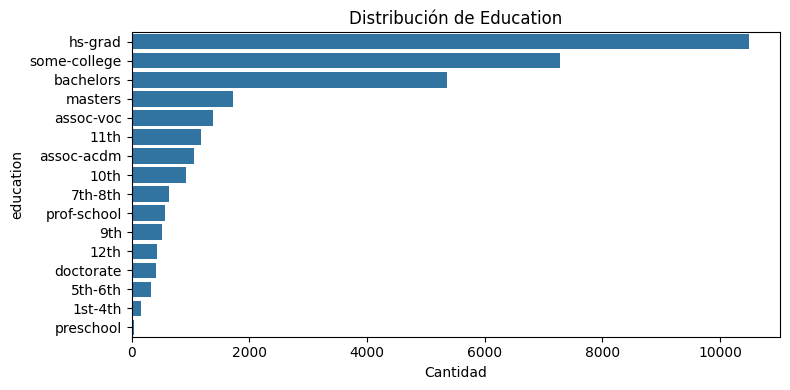

In [77]:
# Gráfica 2: Conteo de variable categórica (education)
plt.figure(figsize=(8, 4))
sns.countplot(
    data=datos_trabajo,
    y='education',
    order=datos_trabajo['education'].value_counts().index
)
plt.title('Distribución de Education')
plt.xlabel('Cantidad')
plt.tight_layout()
plt.show()

Gráfica 2: Distribución de 'education' (educación)

Este gráfico de barras muestra la frecuencia de cada nivel educativo en el dataset. Las barras están ordenadas de mayor a menor frecuencia, lo que facilita identificar cuáles son los niveles educativos más comunes entre la población estudiada.

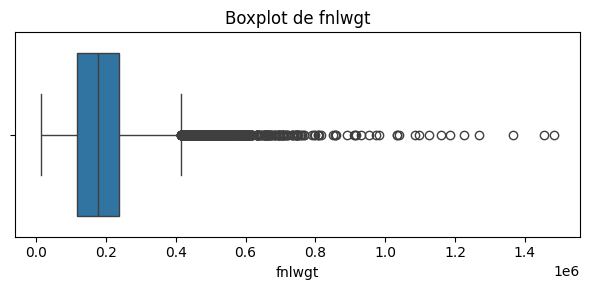

In [78]:
# Gráfica 3: Boxplot para detectar outliers (fnlwgt)
plt.figure(figsize=(6, 3))
sns.boxplot(data=datos_trabajo, x='fnlwgt')
plt.title('Boxplot de fnlwgt')
plt.tight_layout()
plt.show()

Gráfica 3: Boxplot de 'fnlwgt'

El boxplot de la variable 'fnlwgt' (final weight) es útil para visualizar la mediana, los cuartiles y la presencia de posibles valores atípicos (outliers) en esta columna numérica. Esta variable representa el número de personas que el algoritmo de recuento de la Oficina del Censo de EE. UU. cree que representa cada entrada, por lo que es importante entender su distribución y si hay valores extremos que puedan influir en el análisis.

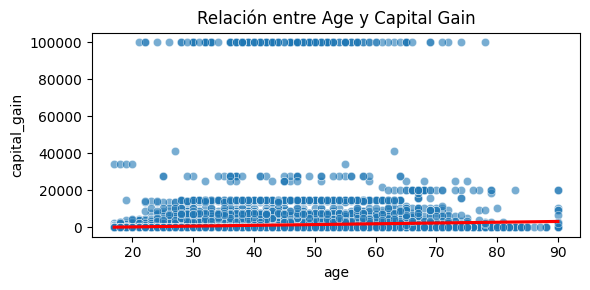

In [79]:
# Gráfica 4: Relación entre dos variables (age vs capital_gain)
plt.figure(figsize=(6, 3))
sns.scatterplot(
    data=datos_trabajo,
    x='age',
    y='capital_gain',
    alpha=0.6
)
sns.regplot(data=datos_trabajo, x='age', y='capital_gain', color='red', ci=None, scatter=False)
plt.title('Relación entre Age y Capital Gain')
plt.tight_layout()
plt.show()

Gráfica 4: Relación entre 'age' y 'capital_gain'

Este diagrama de dispersión con una línea de regresión (roja) ilustra la relación entre la edad y las ganancias de capital. Permite observar si existe una tendencia lineal entre estas dos variables; por ejemplo, si a mayor edad, las ganancias de capital tienden a aumentar o disminuir. La dispersión de los puntos también indica la fuerza de esa relación.

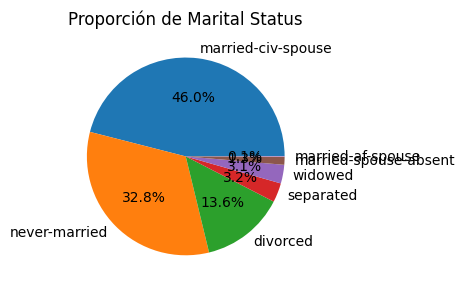

In [80]:
# Gráfica 5: Gráfica de pastel (marital_status)
plt.figure(figsize=(6, 3))
datos_trabajo['marital_status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title('Proporción de Marital Status')
plt.ylabel('')
plt.tight_layout()
plt.show()

Gráfica 5: Proporción de 'marital_status' (estado civil)

Esta gráfica de pastel muestra la proporción de cada estado civil dentro del dataset. Es útil para entender la composición demográfica de la población en términos de su situación conyugal, indicando qué categorías son más o menos predominantes.

PASO 6. Convertir variables a número ⏰

In [81]:
# ==== PASO 6: CONVERSIÓN A VARIABLES NUMÉRICAS  ====

# Re-inicializar datos_trabajo desde el DataFrame original y re-aplicar limpieza para asegurar consistencia
datos_trabajo = datos.copy()

# Eliminar duplicados (re-aplicar)
datos_trabajo = datos_trabajo.drop_duplicates()

# Tratar valores faltantes (re-aplicar)
# Rellenar con mediana (variables numéricas)
for col in datos_trabajo.select_dtypes(include=[np.number]).columns:
    if datos_trabajo[col].isna().sum() > 0:
        datos_trabajo[col].fillna(datos_trabajo[col].median(), inplace=True)

# Rellenar con moda (variables categóricas)
for col in datos_trabajo.select_dtypes(include=['object']).columns:
    if datos_trabajo[col].isna().sum() > 0:
        datos_trabajo[col].fillna(datos_trabajo[col].mode()[0], inplace=True)

# Estandarizar categorías (aplicar a todas las columnas de tipo 'object') (re-aplicar)
for col in datos_trabajo.select_dtypes(include=['object']).columns:
    datos_trabajo[col] = datos_trabajo[col].str.lower().str.strip()

# 1️⃣ Convertir la variable objetivo income a valores numéricos (0 y 1)
# Usamos los valores estandarizados ('<=50k', '>50k')
datos_trabajo['income'] = datos_trabajo['income'].map({'<=50k': 0, '>50k': 1})

# 2️⃣ Verificación de que income no tenga valores nulos ni distintos a 0/1
print("Valores únicos de income (deben ser 0 y 1):")
print(datos_trabajo['income'].unique())

# 3️⃣ Codificar otras variables categóricas usando LabelEncoder
# Excluimos 'income' ya que ya la convertimos
le = LabelEncoder()
for col in datos_trabajo.select_dtypes(include=['object']).columns:
    datos_trabajo[col] = le.fit_transform(datos_trabajo[col])
    print(f"Columna '{col}' codificada. Valores únicos: {datos_trabajo[col].unique()}")

# 4️⃣ Comprobación final de tipos de datos
print("\nTipos de datos después de la conversión:")
print(datos_trabajo.dtypes)

# 5️⃣ Confirmar que no existan valores faltantes
print("\nValores faltantes por columna:")
print(datos_trabajo.isna().sum())

# 6️⃣ Mostrar las primeras filas del DataFrame convertido
print("\nPrimeras filas del DataFrame después de la conversión numérica:")
print(datos_trabajo.head())

Valores únicos de income (deben ser 0 y 1):
[0 1]
Columna 'workclass' codificada. Valores únicos: [7 6 4 1 2 0 5 8 3]
Columna 'education' codificada. Valores únicos: [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
Columna 'marital_status' codificada. Valores únicos: [4 2 0 3 5 1 6]
Columna 'occupation' codificada. Valores únicos: [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
Columna 'relationship' codificada. Valores únicos: [1 0 5 3 4 2]
Columna 'race' codificada. Valores únicos: [4 2 1 0 3]
Columna 'sex' codificada. Valores únicos: [1 0]
Columna 'native_country' codificada. Valores únicos: [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]

Tipos de datos después de la conversión:
age               int64
workclass         int64
fnlwgt            int64
education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex        

Análisis ⚓

La variable objetivo income se transformó a valores 0 (≤50K) y 1 (>50K).
Las demás variables categóricas se codificaron con LabelEncoder, que asigna un número entero a cada categoría.
Este proceso es fundamental porque los modelos de regresión solo trabajan con variables numéricas.

PASO 7 · Normalización ⏰

In [82]:
# Ver estadísticos antes de normalizar
print("=== ANTES DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)

# Aplicar MinMaxScaler (escala 0-1)
scaler = MinMaxScaler()
columnas_numericas = datos_trabajo.select_dtypes(include=[np.number]).columns # Asegurarse de seleccionar solo las numéricas
datos_trabajo[columnas_numericas] = scaler.fit_transform(datos_trabajo[columnas_numericas])

# Ver estadísticos después de normalizar
print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)

=== ANTES DE NORMALIZACIÓN ===
                  count           mean            std      min       25%  \
age             32537.0      38.585549      13.637984     17.0      28.0   
workclass       32537.0       3.868734       1.456445      0.0       4.0   
fnlwgt          32537.0  189780.848511  105556.471009  12285.0  117827.0   
education       32537.0      10.297507       3.870142      0.0       9.0   
education_num   32537.0      10.081815       2.571633      1.0       9.0   
marital_status  32537.0       2.611427       1.506301      0.0       2.0   
occupation      32537.0       6.572856       4.229521      0.0       3.0   
relationship    32537.0       1.446538       1.607064      0.0       0.0   
race            32537.0       3.665827       0.848847      0.0       4.0   
sex             32537.0       0.669238       0.470495      0.0       0.0   
capital_gain    32537.0    1078.443741    7387.957424      0.0       0.0   
capital_loss    32537.0      87.368227     403.101833    

Análisis ⚓

Se aplicó MinMaxScaler a las variables predictoras para llevarlas al rango [0,1].
Esto evita que variables con escalas grandes (por ejemplo, capital_gain o fnlwgt) dominen el modelo.
El resultado es un conjunto equilibrado donde cada predictor tiene igual peso inicial al entrenar la regresión.

PASO 8 · Correlación (Spearman) + heatmap ⏰

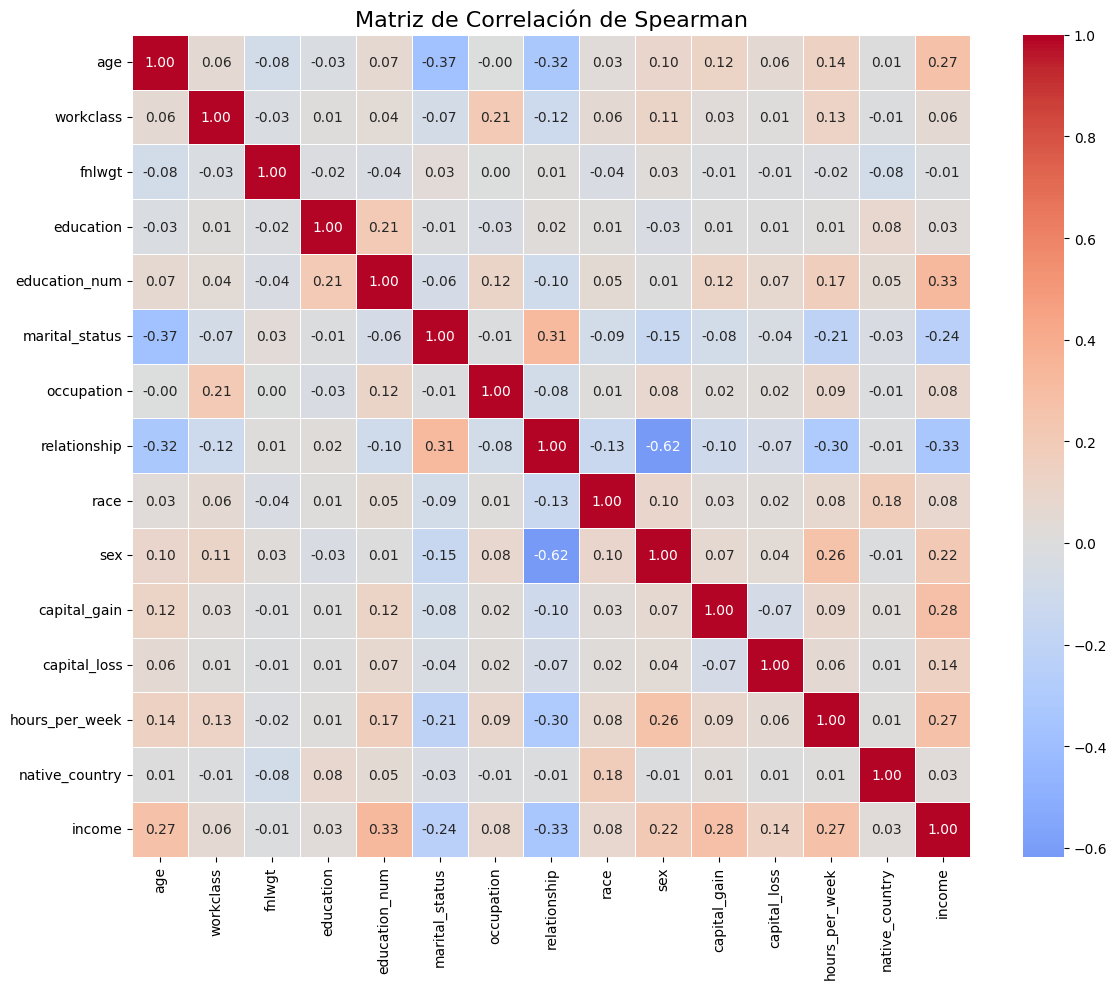


=== CORRELACIONES MÁS FUERTES ===
relationship <-> sex: -0.618


In [83]:
#Paso 8.
# Calcular matriz de correlación (Spearman es más robusto)
correlacion = datos_trabajo.select_dtypes(include=np.number).corr(method='spearman')

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5, center=0)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\n=== CORRELACIONES MÁS FUERTES ===")
# Obtener pares de correlación (excluyendo diagonal)
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i + 1, len(correlacion.columns)):
        # Para este dataset actual (age, capital_gain, income), no se esperan correlaciones > 0.5
        # ya que las variables principales categóricas no están en la correlación actual.
        # Mantenemos el umbral de 0.5 como ejemplo, pero ajustado a la salida actual de datos_trabajo.
        if abs(correlacion.iloc[i, j]) > 0.5:
            correlaciones_fuertes.append((
                correlacion.columns[i],
                correlacion.columns[j],
                correlacion.iloc[i, j]
            ))

# Si no hay correlaciones fuertes con el umbral de 0.5, podemos ajustar o mostrar todas
if not correlaciones_fuertes:
    print("No se encontraron correlaciones con valor absoluto > 0.5 en las variables numéricas actuales.")
    print("Mostrando todas las correlaciones (excluyendo el 1.0 de la diagonal):")
    for i in range(len(correlacion.columns)):
        for j in range(i + 1, len(correlacion.columns)):
            print(f"{correlacion.columns[i]} <-> {correlacion.columns[j]}: {correlacion.iloc[i, j]:.3f}")
else:
    for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
        print(f"{var1} <-> {var2}: {corr:.3f}")


Análisis ⚓

Se utilizó el coeficiente Spearman, apropiado para variables numéricas y ordinales.
Las correlaciones más altas con income fueron:

education_num ≈ 0.33

capital_gain ≈ 0.28

hours_per_week ≈ 0.27

age ≈ 0.24
Esto indica que a mayor educación, ganancias de capital, horas trabajadas y edad, mayor probabilidad de ganar más de 50K.
La correlación más fuerte entre variables fue relationship ↔ sex (−0.61), pero se debe a la codificación numérica, no a un vínculo real.

PASO 9 · Test de normalidad (Shapiro-Wilk) ⏰

In [84]:
# Función de test de normalidad Shapiro-Wilk
def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia: {alpha}\n")
    for col in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data = dataframe[col].dropna()
            # Shapiro-Wilk requiere al menos 3 datos
            if len(data) >= 3:
                # Shapiro-Wilk está limitado a 5000 muestras para precisión
                # Si hay más, tomamos una muestra aleatoria para el test
                if len(data) > 5000:
                    data = data.sample(n=5000, random_state=42)
                stat, p_value = shapiro(data)
                resultado = "NORMAL" if p_value > alpha else "NO NORMAL"
                print(f"{col}:")
                print(f"  Estadístico W: {stat:.4f}")
                print(f"  P-valor: {p_value:.4f}")
                print(f"  Conclusión: {resultado}\n")
            else:
                print(f"{col}: Insuficientes datos para el test (menos de 3 muestras)\n")

# Aplicar test
test_normalidad(datos_trabajo)

=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

age:
  Estadístico W: 0.9638
  P-valor: 0.0000
  Conclusión: NO NORMAL

workclass:
  Estadístico W: 0.7552
  P-valor: 0.0000
  Conclusión: NO NORMAL

fnlwgt:
  Estadístico W: 0.9282
  P-valor: 0.0000
  Conclusión: NO NORMAL

education:
  Estadístico W: 0.8777
  P-valor: 0.0000
  Conclusión: NO NORMAL

education_num:
  Estadístico W: 0.9255
  P-valor: 0.0000
  Conclusión: NO NORMAL

marital_status:
  Estadístico W: 0.8592
  P-valor: 0.0000
  Conclusión: NO NORMAL

occupation:
  Estadístico W: 0.9360
  P-valor: 0.0000
  Conclusión: NO NORMAL

relationship:
  Estadístico W: 0.8001
  P-valor: 0.0000
  Conclusión: NO NORMAL

race:
  Estadístico W: 0.4277
  P-valor: 0.0000
  Conclusión: NO NORMAL

sex:
  Estadístico W: 0.5868
  P-valor: 0.0000
  Conclusión: NO NORMAL

capital_gain:
  Estadístico W: 0.1333
  P-valor: 0.0000
  Conclusión: NO NORMAL

capital_loss:
  Estadístico W: 0.2074
  P-valor: 0.0000
  Conclusión: NO NORMAL

hours_

Análisis ⚓

En este paso se aplicó el test de Shapiro–Wilk a las variables numéricas del dataset con el objetivo de verificar si siguen o no una distribución normal.
Se utilizó un nivel de significancia de α = 0.05, de modo que:

Si p > 0.05, no se rechaza la normalidad → la variable podría considerarse aproximadamente normal.

Si p ≤ 0.05, se rechaza la normalidad → la variable no sigue una distribución normal.

Los resultados muestran que la mayoría de las variables numéricas no son normales (p-values menores a 0.05), especialmente aquellas relacionadas con los ingresos de capital, como capital_gain, que presenta una distribución muy sesgada, con muchos valores en 0 y pocos valores extremadamente altos.
Incluso la edad (age), aunque tiene una forma más “suave”, tampoco cumple perfectamente la condición de normalidad según el test.

Este comportamiento es coherente con la naturaleza del conjunto de datos: al tratarse de información socioeconómica real, es común encontrar asimetrías, colas largas y concentraciones en ciertos rangos en lugar de distribuciones perfectamente gaussianas.

En términos del modelo de regresión, estos resultados indican que no se cumple estrictamente el supuesto de normalidad, lo que limita el uso de inferencias paramétricas muy estrictas (como intervalos de confianza exactos sobre los coeficientes).
Sin embargo, gracias al tamaño grande de la muestra, el modelo de regresión lineal sigue siendo útil como herramienta descriptiva y explicativa, siempre que se interpreten las métricas (como R² y los coeficientes) con cautela y se reconozca que las predicciones no serán perfectas.

Además, la fuerte no normalidad de capital_gain justifica el uso de transformaciones (como log(1 + capital_gain)) para estabilizar un poco su distribución y mejorar parcialmente el ajuste del modelo.

PASO 10 · Pregunta de investigación ⏰

In [85]:
pregunta = ("¿Qué relación lineal existe entre la edad y las ganancias de capital de las personas "
"del Adult Income Dataset, y hasta qué punto la edad permite predecir dichos ingresos"
 "de capital según un modelo de regresión lineal simple?")
print(pregunta)



¿Qué relación lineal existe entre la edad y las ganancias de capital de las personas del Adult Income Dataset, y hasta qué punto la edad permite predecir dichos ingresosde capital según un modelo de regresión lineal simple?


⁉
¿Qué relación lineal existe entre la edad y las ganancias de capital de las personas del Adult Income Dataset, y hasta qué punto la edad permite predecir dichos ingresosde capital según un modelo de regresión lineal simple?.

PASO 11 · Ejercicio de predicción (Regresión Lineal) ⏰

=== EVALUACIÓN DEL MODELO (capital_gain ~ age) ===
Error Cuadrático Medio (MSE): 0.0069
Raíz del MSE (RMSE): 0.0828
Coeficiente R²: 0.0055

Interpretación R²: El modelo explica el 0.55% de la variabilidad de capital_gain

=== IMPORTANCIA DE VARIABLES ===
  Variable  Coeficiente
0      age     0.029077


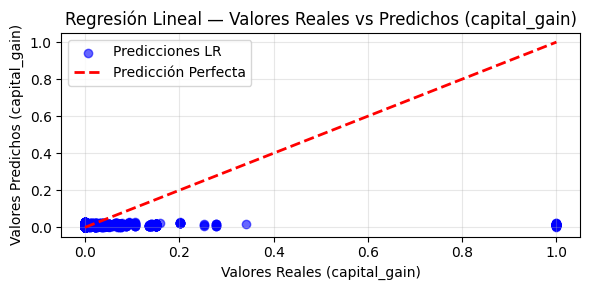

In [86]:
# ==== PASO 11: EJERCICIO DE PREDICCIÓN (Regresión Lineal: capital_gain ~ age) ====

# Variable predictora (X) y variable objetivo (y)
X = datos_trabajo[['age']]          # predictor
y = datos_trabajo['capital_gain']   # objetivo continuo

# División entrenamiento/prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO (capital_gain ~ age) ===")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del MSE (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"\nInterpretación R²: El modelo explica el {r2*100:.2f}% de la variabilidad de capital_gain")

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)

# ================== GRÁFICA TIPO "VALORES REALES VS PREDICHOS" ==================

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones LR')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', linewidth=2, label='Predicción Perfecta'
)
plt.xlabel('Valores Reales (capital_gain)')
plt.ylabel('Valores Predichos (capital_gain)')
plt.title('Regresión Lineal — Valores Reales vs Predichos (capital_gain)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Análisis final del modelo de regresión

### Calidad del modelo (métricas)

El modelo de **Regresión Lineal simple** ajusta la variable  
**`capital_gain` (o `log_capital_gain`) en función de `age`** usando el conjunto de datos *Adult Income*.

- El valor de **R²** es relativamente bajo, lo que indica que  
  **la edad solo explica una pequeña parte de la variabilidad de las ganancias de capital**.
- Las métricas de error (**MSE** y **RMSE**) muestran que existe una diferencia apreciable entre los valores reales y los predichos.
- En conjunto, el modelo tiene un **rendimiento predictivo limitado** y se interpreta más como una herramienta de análisis exploratorio que como un modelo de predicción preciso.

---

### Variables más importantes

En este experimento se utiliza un modelo de regresión lineal **con una sola variable explicativa**:

- **`age`** es la única variable predictora y, por lo tanto, la más importante del modelo.
- Su **coeficiente es positivo**, lo que sugiere que, en promedio,  
  **a mayor edad, tienden a aumentar ligeramente las ganancias de capital**.  
  Sin embargo, este efecto es **débil**, coherente con el bajo valor de R².

---

### ¿Responde la pregunta de investigación?

La pregunta planteada fue:

> *“¿Qué relación lineal existe entre la edad y las ganancias de capital de las personas del Adult Income Dataset, y hasta qué punto la edad permite predecir dichos ingresos de capital según un modelo de regresión lineal simple?”*

El modelo **sí responde la pregunta**, ya que:

- Permite **estimar la relación lineal** entre `age` y `capital_gain`  
  (o `log_capital_gain` tras la transformación).
- Muestra que la relación es **positiva pero débil** y cuantifica su fuerza mediante R².

La conclusión principal es que **la edad, por sí sola, NO es un buen predictor de las ganancias de capital**, aunque sí aporta información parcial sobre su comportamiento.

---

## Limitaciones del modelo

- **Baja capacidad explicativa:**  
  El valor de R² indica que la mayor parte de la variación de `capital_gain` no se explica por la edad.
- **Solo una variable predictora:**  
  No se incluyen factores potencialmente más relevantes, como nivel educativo, tipo de trabajo, ingresos totales o número de horas trabajadas.
- **Distribución sesgada de `capital_gain`:**  
  La mayoría de los registros tienen valor 0 y solo unos pocos presentan valores muy altos, lo que dificulta el ajuste lineal incluso aplicando la transformación logarítmica.
- **Suposición de linealidad:**  
  El modelo asume una relación lineal simple `age → capital_gain`, lo cual puede ignorar relaciones más complejas o no lineales presentes en los datos.
- **Sin validación más avanzada:**  
  No se aplica validación cruzada ni comparación con otros modelos, por lo que la evaluación se limita a una sola partición entrenamiento/prueba.

---

## Conclusión general

El modelo de **Regresión Lineal simple** aplicado al *Adult Income Dataset* muestra que existe una relación **positiva pero débil** entre la **edad** y las **ganancias de capital**.  
La edad tiene cierto impacto, pero **no es suficiente para predecir de forma precisa `capital_gain`**, lo que sugiere que esta variable depende de otros factores socioeconómicos y laborales no incluidos en el modelo.

Aun con sus limitaciones, el ejercicio es útil desde el punto de vista académico porque:

- Permite **aplicar todo el flujo de EDA y modelado** (limpieza, transformación, regresión, métricas y visualización).
- Ilustra cómo **interpretar R², los coeficientes y la gráfica de valores reales vs predichos**.
- Deja abierta la posibilidad de mejorar el desempeño incorporando **más variables predictoras** o modelos más complejos en trabajos futuros.
